## Description and goal
This work was carried out in the context of the online Dataquest Python courses.
Hypothetically, as a member of the data science team, my goal for this project is to analyze the given data, in order to help our developers understand what type of apps are more like to atract more users. Building apps that are free to download and install, our main source of revenue consists of in-app ads. This means the more users that engage with the ads, the better. 
The results of the analysis will further help our developers know the needs of the market and be driven through new ways of building a useful app!

## Datasets
The data where the analysis is based on are:
1) A data set containing data about approximately 10,000 Android apps from Google Play; Data collection in August 2018
2) A data set containing data about approximately 7,000 iOS apps from the App Store; Data collection in July 2017.

## Personal Statement
In terms of personal developement, this project was a good oppurtunity for me to apply the Python tools I've learned so far. Having given the datasets, I had to access and explore the data, apply preprocessing techniques to further clean the data, overcome challenges of missing or unedited data. This required the creation of specific functions to handle the data and the use of frequency tables to better organize the data. 

I realized that bringing out results requires a good understanding of the data I'm working with. I experienced the challenges when working with unclear and big datasets and the ways to overcome them. Finally, communicating the results to third readers requires clear and comprehensive descriptions of my work.

**Opening and exploring the datasets**

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from csv import reader

In [75]:
def open_dataset(file_name):
    opened_file = open(file_name, encoding="utf8")
    read_file = reader(opened_file)
    data = list(read_file)
    return data

In [76]:
def explore_data(dataset,start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n')

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

In [77]:
app_store_apps = open_dataset("AppleStore.csv")
google_apps = open_dataset('googleplaystore.csv')
app_store_header = app_store_apps[0]
app_store_data = app_store_apps[1:]
google_apps_header = google_apps[0]
google_apps_data = google_apps[1:]

print(app_store_header)
print(google_apps_header)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']
['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [78]:
explore_data(app_store_data,0,3,True)

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows: 7197
Number of columns: 16


In [79]:
print(google_apps_header)
explore_data(google_apps, 1, 4, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10842
Number of columns: 13


In [80]:
for app in google_apps_data:
    name = app[0]
    if name == "Facebook":
        print(app)

['Facebook', 'SOCIAL', '4.1', '78158306', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'August 3, 2018', 'Varies with device', 'Varies with device']
['Facebook', 'SOCIAL', '4.1', '78128208', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'August 3, 2018', 'Varies with device', 'Varies with device']


**Calculating duplicated entries**

In [81]:
duplicate_google_apps = []
unique_google_apps = []

for app in google_apps_data:
    name = app[0]
    if name in unique_google_apps:
        duplicate_google_apps.append(name)
    else:
        unique_google_apps.append(name)
print(len (duplicate_google_apps))
print (len(unique_google_apps))

1181
9660


In [82]:
duplicate_app_store = []
unique_app_store = []

for app in app_store_data:
    name = app[1]
    if name in unique_app_store:
        duplicate_app_store.append(name)
    else:
        unique_app_store.append(name)

print(len(duplicate_app_store))
print(len(unique_app_store))

2
7195


**Removing duplicated apps, keeping the rows with the most recent information on the app (maximum users'reviews)

In [83]:
print("Expected length:", len(google_apps_data) - 1181)
#Expected length = 9659

Expected length: 9660


**Google apps with maximum reviews**

In [84]:
google_reviews_max= {}

for app in google_apps_data:
    name = app[0]
    n_reviews_str = app[3]
    
    if "M" in n_reviews_str:
        n_reviews_str = n_reviews_str.replace("M", "")
        n_reviews = float(n_reviews_str) * 1000000
    else:    
        n_reviews = float(app[3])
    
    if name in google_reviews_max and google_reviews_max[name] < n_reviews :
        google_reviews_max[name] = n_reviews
    elif name not in google_reviews_max:
        google_reviews_max[name] = n_reviews
    
    

**iOS apps with maximum reviews**

In [85]:
app_store_reviews_max = {} 

for app in app_store_data :
    name = app[1]
    n_reviews_str = app[5]
    
    if "M" in n_reviews_str:
        n_reviews_str = n_reviews_str.replace("M", "")
        n_reviews = float(n_reviews_str) * 1000000
    else:    
        n_reviews = float(app[5])
    
    if name in app_store_reviews_max and app_store_reviews_max[name] < n_reviews :
        app_store_reviews_max[name] = n_reviews
    elif name not in app_store_reviews_max:
        app_store_reviews_max[name] = n_reviews
        

** Cleaning Google apps**

In [86]:
google_apps_data_clean = []
google_already_added = []

for app in google_apps_data:
    name = app[0]
    n_reviews_str = app[3]
    
    if "M" in n_reviews_str:
        n_reviews_str = n_reviews_str.replace("M", "")
        n_reviews = float(n_reviews_str) * 1000000
    else:    
        n_reviews = float(app[3])
    
    if (n_reviews == google_reviews_max[name]) and (name not in google_already_added):
        google_apps_data_clean.append(app)
        google_already_added.append(name)  
    

**Cleaning iOS apps**

In [87]:
app_store_data_clean = []
app_store_already_added = []

for app in app_store_data:
    name = app[1]
    n_reviews_str = app[5]
    
    if "M" in n_reviews_str:
        n_reviews_str = n_reviews_str.replace("M", "")
        n_reviews = float(n_reviews_str) * 1000000
    else:    
        n_reviews = float(app[5])
    
    if (n_reviews == app_store_reviews_max[name]) and (name not in app_store_already_added):
        app_store_data_clean.append(app)
        app_store_already_added.append(name) 


**Distinguishing the english apps**

In [88]:
def set_finder(a_string):
    counter = 0    
    for character in a_string:        
        if ord(character) > 127:
            counter += 1 
        if counter >= 3 :
            return False
        
    return True

In [89]:
english_google_apps = []

for app in google_apps_data_clean:
    name = app[0]
    if set_finder(name):
        english_google_apps.append(app)    

In [90]:
english_app_store = []

for app in app_store_data_clean:
    name = app[1]
    if set_finder(name):
        english_app_store.append(app)

In [91]:
free_google_apps = []
non_free_google_apps = []
for app in english_google_apps:
    name = app[0]
    price = app[7]
    if price == "0":
        free_google_apps.append(app)
    else:
        non_free_google_apps.append(name)
    
print(len(free_google_apps))
print(len(non_free_google_apps))

8848
750


In [92]:
free_app_store = []
non_free_app_store = []

for app in english_app_store:
    name = app[1]
    price = app[4]
    
    if price == "0.0":
        free_app_store.append(app)
    else:
        non_free_app_store.append(name)
print(len(free_app_store))
        

3201


**Building frequency tables for the "prime_genre" column of the App Store dataset and "Genres and Category" columns of the Google Play dataset**


**Generating frequency tables that show percentages**

In [93]:
def freq_table(dataset, index):
    table = {}
    
    for row in dataset:
        value = row[index]
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
        
    table_percent = {}
    for value in table:
        table_percent[value] = table[value] / len(dataset) * 100
    
    return table_percent

**Displaying the percentages in a descending order**

In [100]:
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
        
    table_sorted = sorted(table_display, reverse = True)
    table_sorted_df = pd.DataFrame(table_sorted, columns=['Percentage', 'Characteristic'] )
    for entry in table_sorted:
        print(entry[1], ':', entry[0])
        
    return table_sorted_df

In [105]:
genre_table_df = display_table(free_app_store, 11)
genre_table_df.head()

Games : 58.23180256169947
Entertainment : 7.841299593876913
Photo & Video : 4.99843798812871
Education : 3.6863480162449234
Social Networking : 3.3114651671352706
Shopping : 2.592939706341768
Utilities : 2.4679787566385505
Sports : 2.1555763823805063
Music : 2.0618556701030926
Health & Fitness : 2.0306154326772883
Productivity : 1.7494532958450486
Lifestyle : 1.5620118712902218
News : 1.3433302093095907
Travel : 1.2496094970321776
Finance : 1.0934083099031553
Weather : 0.8747266479225243
Food & Drink : 0.8122461730709154
Reference : 0.5310840362386754
Business : 0.5310840362386754
Book : 0.37488284910965325
Navigation : 0.18744142455482662
Medical : 0.18744142455482662
Catalogs : 0.12496094970321774


,Percentage,Characteristic
0,58.231803,Games
1,7.841300,Entertainment
2,4.998438,Photo & Video
3,3.686348,Education
4,3.311465,Social Networking


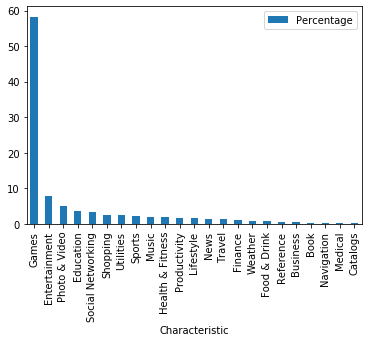

In [109]:
genre_table_df.plot.bar(x= 'Characteristic', y="Percentage")

**App Stores apps - Percentage Table analysis**

Having a look at the percentage table created for the prime_genre column, we can see that "Games" is the dominant category of the Free English apps (58%). "Entertainment" then occupies 7% of the dataset. "Photo and Video" apps correspond to almost 5% of the dataset. "Education" and "Social Networking" share similar percentages, around 3,5%. The percentages of the rest of the categories range between 0,1 and 3%.

The general impression is that App Store  is dominated by apps that are designed for fun (games, entertainment, photo and video, social networking, sports, music, etc.), while apps with practical purposes (education, shopping, utilities, productivity, lifestyle, etc.) are more rare. However, the fact that fun apps are the most numerous doesn't also imply that they also have the greatest number of users — the demand might not be the same as the offer.

In [96]:
display_table(free_google_apps, 1) #Category

[(18.942133815551536, 'FAMILY'), (9.697106690777577, 'GAME'), (8.453887884267631, 'TOOLS'), (4.599909584086799, 'BUSINESS'), (3.899186256781193, 'PRODUCTIVITY'), (3.887884267631103, 'LIFESTYLE'), (3.7070524412296564, 'FINANCE'), (3.5375226039783, 'MEDICAL'), (3.390596745027125, 'SPORTS'), (3.322784810126582, 'PERSONALIZATION'), (3.2323688969258586, 'COMMUNICATION'), (3.0854430379746836, 'HEALTH_AND_FITNESS'), (2.949819168173599, 'PHOTOGRAPHY'), (2.802893309222423, 'NEWS_AND_MAGAZINES'), (2.667269439421338, 'SOCIAL'), (2.3395117540687163, 'TRAVEL_AND_LOCAL'), (2.2490958408679926, 'SHOPPING'), (2.1360759493670884, 'BOOKS_AND_REFERENCE'), (1.8648282097649187, 'DATING'), (1.7970162748643763, 'VIDEO_PLAYERS'), (1.3901446654611211, 'MAPS_AND_NAVIGATION'), (1.2432188065099457, 'FOOD_AND_DRINK'), (1.164104882459313, 'EDUCATION'), (0.9606690777576853, 'ENTERTAINMENT'), (0.9380650994575045, 'LIBRARIES_AND_DEMO'), (0.9267631103074141, 'AUTO_AND_VEHICLES'), (0.8024412296564195, 'HOUSE_AND_HOME'), 

[(18.942133815551536, 'FAMILY'),
 (9.697106690777577, 'GAME'),
 (8.453887884267631, 'TOOLS'),
 (4.599909584086799, 'BUSINESS'),
 (3.899186256781193, 'PRODUCTIVITY'),
 (3.887884267631103, 'LIFESTYLE'),
 (3.7070524412296564, 'FINANCE'),
 (3.5375226039783, 'MEDICAL'),
 (3.390596745027125, 'SPORTS'),
 (3.322784810126582, 'PERSONALIZATION'),
 (3.2323688969258586, 'COMMUNICATION'),
 (3.0854430379746836, 'HEALTH_AND_FITNESS'),
 (2.949819168173599, 'PHOTOGRAPHY'),
 (2.802893309222423, 'NEWS_AND_MAGAZINES'),
 (2.667269439421338, 'SOCIAL'),
 (2.3395117540687163, 'TRAVEL_AND_LOCAL'),
 (2.2490958408679926, 'SHOPPING'),
 (2.1360759493670884, 'BOOKS_AND_REFERENCE'),
 (1.8648282097649187, 'DATING'),
 (1.7970162748643763, 'VIDEO_PLAYERS'),
 (1.3901446654611211, 'MAPS_AND_NAVIGATION'),
 (1.2432188065099457, 'FOOD_AND_DRINK'),
 (1.164104882459313, 'EDUCATION'),
 (0.9606690777576853, 'ENTERTAINMENT'),
 (0.9380650994575045, 'LIBRARIES_AND_DEMO'),
 (0.9267631103074141, 'AUTO_AND_VEHICLES'),
 (0.80244122965

The landscape seems significantly different on Google Play: there are not that many apps designed for fun, and it seems that a good number of apps are designed for practical purposes (family, tools, business, lifestyle, productivity, etc.). However, if we investigate this further, we can see that the family category (which accounts for almost 19% of the apps) means mostly games for kids.
Even so, practical apps seem to have a better representation on Google Play compared to App Store. This picture is also confirmed by the frequency table we see for the Genres column:

In [97]:
display_table(free_google_apps, 9) #Genres

[(8.44258589511754, 'Tools'), (6.080470162748644, 'Entertainment'), (5.357142857142857, 'Education'), (4.599909584086799, 'Business'), (3.899186256781193, 'Productivity'), (3.8765822784810124, 'Lifestyle'), (3.7070524412296564, 'Finance'), (3.5375226039783, 'Medical'), (3.4584086799276674, 'Sports'), (3.322784810126582, 'Personalization'), (3.2323688969258586, 'Communication'), (3.096745027124774, 'Action'), (3.0854430379746836, 'Health & Fitness'), (2.949819168173599, 'Photography'), (2.802893309222423, 'News & Magazines'), (2.667269439421338, 'Social'), (2.328209764918626, 'Travel & Local'), (2.2490958408679926, 'Shopping'), (2.1360759493670884, 'Books & Reference'), (2.0456600361663653, 'Simulation'), (1.8648282097649187, 'Dating'), (1.842224231464738, 'Arcade'), (1.7744122965641953, 'Video Players & Editors'), (1.763110307414105, 'Casual'), (1.3901446654611211, 'Maps & Navigation'), (1.2432188065099457, 'Food & Drink'), (1.1301989150090417, 'Puzzle'), (0.9945750452079566, 'Racing')

[(8.44258589511754, 'Tools'),
 (6.080470162748644, 'Entertainment'),
 (5.357142857142857, 'Education'),
 (4.599909584086799, 'Business'),
 (3.899186256781193, 'Productivity'),
 (3.8765822784810124, 'Lifestyle'),
 (3.7070524412296564, 'Finance'),
 (3.5375226039783, 'Medical'),
 (3.4584086799276674, 'Sports'),
 (3.322784810126582, 'Personalization'),
 (3.2323688969258586, 'Communication'),
 (3.096745027124774, 'Action'),
 (3.0854430379746836, 'Health & Fitness'),
 (2.949819168173599, 'Photography'),
 (2.802893309222423, 'News & Magazines'),
 (2.667269439421338, 'Social'),
 (2.328209764918626, 'Travel & Local'),
 (2.2490958408679926, 'Shopping'),
 (2.1360759493670884, 'Books & Reference'),
 (2.0456600361663653, 'Simulation'),
 (1.8648282097649187, 'Dating'),
 (1.842224231464738, 'Arcade'),
 (1.7744122965641953, 'Video Players & Editors'),
 (1.763110307414105, 'Casual'),
 (1.3901446654611211, 'Maps & Navigation'),
 (1.2432188065099457, 'Food & Drink'),
 (1.1301989150090417, 'Puzzle'),
 (0.

One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Google Play data set, we can find this information in the Installs column, but this information is missing for the App Store data set. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the rating_count_tot app.

**Calculating the average number of user ratings per app genre on the App Store**

In [98]:
genres_ios = freq_table(free_app_store, -5)

for genre in genres_ios:
    total = 0 ##this variable stores the sum of user ratings, specific to each genre
    len_genre = 0 ##this variable stores the number of apps specific to each genre
    for app in free_app_store:
        genre_app = app[-5]
        if genre_app == genre:
            n_ratings = float(app[5])
            total += n_ratings
            len_genre =+ 1
    avg_ratings = total / len_genre
    print(genre, ":", avg_ratings)

Social Networking : 7584125.0
Photo & Video : 4550647.0
Games : 42705789.0
Music : 3783551.0
Reference : 1348958.0
Health & Fitness : 1514371.0
Weather : 1463837.0
Utilities : 1513363.0
Travel : 1129752.0
Shopping : 2260151.0
News : 913665.0
Navigation : 516542.0
Lifestyle : 840774.0
Entertainment : 3563035.0
Food & Drink : 866682.0
Sports : 1587614.0
Book : 556619.0
Finance : 1132846.0
Education : 826470.0
Productivity : 1177591.0
Business : 127349.0
Catalogs : 16016.0
Medical : 3672.0


Looking at the results from our average-rating table, we can see "Games" has the highest mean of ratings (42.705.789,00).

In [99]:
google_installs = freq_table(free_google_apps, 1)
for category in google_installs:
    total = 0
    len_category = 0
    for app in free_google_apps:
        category_app = app[1]
        if category_app == category:
            n_installs = (app[5])
            n_installs = n_installs.replace(',', '')
            n_installs = n_installs.replace('+', '')
            total += float(n_installs)
            len_category +=1
    avg_n_installs = total / len_category
    print(category, ":", avg_n_installs)

ART_AND_DESIGN : 1986335.0877192982
AUTO_AND_VEHICLES : 647317.8170731707
BEAUTY : 513151.88679245283
BOOKS_AND_REFERENCE : 8814199.78835979
BUSINESS : 1712290.1474201474
COMICS : 832613.8888888889
COMMUNICATION : 38590581.08741259
DATING : 854028.8303030303
EDUCATION : 1833495.145631068
ENTERTAINMENT : 11640705.88235294
EVENTS : 253542.22222222222
FINANCE : 1387692.475609756
FOOD_AND_DRINK : 1924897.7363636363
HEALTH_AND_FITNESS : 4188821.9853479853
HOUSE_AND_HOME : 1360598.042253521
LIBRARIES_AND_DEMO : 638503.734939759
LIFESTYLE : 1446158.2238372094
GAME : 15544014.51048951
FAMILY : 3695641.8198090694
MEDICAL : 120550.61980830671
SOCIAL : 23253652.127118643
SHOPPING : 7036877.311557789
PHOTOGRAPHY : 17840110.40229885
SPORTS : 3650602.276666667
TRAVEL_AND_LOCAL : 13984077.710144928
TOOLS : 10830251.970588235
PERSONALIZATION : 5201482.6122448975
PRODUCTIVITY : 16787331.344927534
PARENTING : 542603.6206896552
WEATHER : 5145550.285714285
VIDEO_PLAYERS : 24727872.452830188
NEWS_AND_MAGAZ